In [7]:
%load_ext autoreload
%autoreload 2

import pyattimo
from motiflets.plotting import *
# from motiflets.plotting import plot_motifsets

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# load a dataset, any list of numpy array of floats works fine
# The following call loads the first 100000 points of the ECG 
# dataset (which will be downloaded from the internet)
ts = pyattimo.load_dataset('ecg', prefix=10_000)
series = ts.flatten()
ds_name = "ECG"

print("Size of DS: ", series.shape)

Size of DS:  (10000,)


In [26]:
# Now we can find k-motiflets:
#  - w is the window length
#  - repetitions is the number of LSH repetitions
start = time.time()

max_k = 20
l = 200
m_iter = pyattimo.MotifletsIterator(
    ts, w=l, support=max_k
)

for m in m_iter:
    print(m.indices)    
    print(m.extent)
    # np.sort(m.indices)
    
end = time.time()
print("Discovered "+str(max_k)+" motiflets in", end - start, "seconds")    

[416, 2580]
0.3602263011837129
[616, 7864, 5208]
0.545457976669994
[616, 7864, 5208, 6520]
0.6583577846452348
[5208, 616, 7864, 6520, 1580]
0.8769018877664725
[6516, 1576, 7860, 5204, 612, 9064]
1.0785960135217405
[1574, 6514, 5202, 7858, 9062, 610, 4038]
1.1277108278589758
[1392, 6332, 5020, 3856, 8880, 2592, 7676, 428]
1.605256718369797
[580, 7828, 2744, 6484, 1544, 4008, 5171, 9031, 3196]
5.6979114564048725
[7686, 2602, 438, 6342, 1402, 3866, 5030, 8890, 1839, 6794]
6.562047444718084
[3868, 5032, 1404, 6344, 8892, 2604, 7688, 440, 1840, 6797, 3056]
6.914091794039496
[2600, 436, 7684, 6340, 1400, 3864, 5027, 8888, 1835, 6795, 3051, 880]
7.430528404986528
[1400, 6340, 5028, 3864, 8888, 2600, 7684, 436, 1842, 6793, 3051, 879, 5482]
7.751291201771973
[5031, 1403, 3867, 6343, 8891, 2603, 7687, 440, 6795, 1840, 3055, 4295, 5483, 884]
7.9517094578100345
[1836, 3047, 872, 6788, 5492, 8128, 1398, 8887, 6339, 437, 9296, 2601, 7684, 3864, 5026]
8.68665128409694
[1840, 3052, 875, 5494, 6791, 81

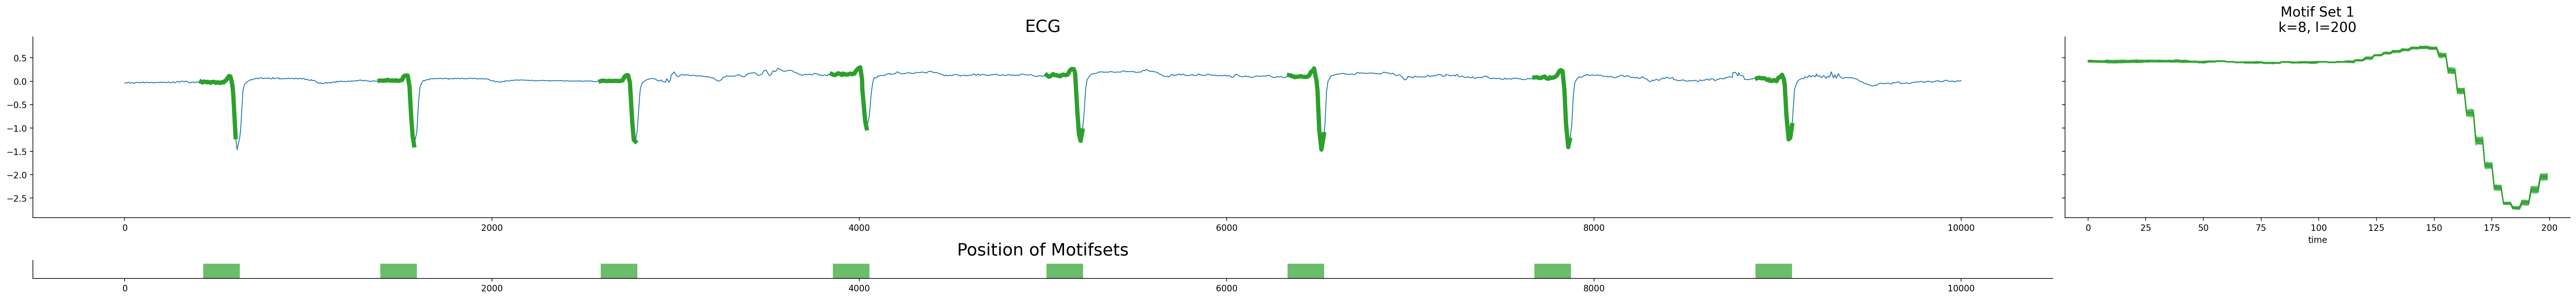

In [29]:
motifs =  [[1392, 6332, 5020, 3856, 8880, 2592, 7676, 428]]

_ = plot_motifsets(
    ds_name,
    series,
    motifsets=motifs,
    motif_length=l)

Data 10000
n: 9801 m 200 k 10 support 2
motiflet: [416, 2580] extent=0.3602263011837129
n: 9801 m 200 k 10 support 3
motiflet: [616, 7864, 5208] extent=0.545457976669994
n: 9801 m 200 k 10 support 4
motiflet: [616, 7864, 5208, 6520] extent=0.6583577846452348
n: 9801 m 200 k 10 support 5
motiflet: [5208, 616, 7864, 6520, 1580] extent=0.8769018877664725
n: 9801 m 200 k 10 support 6
motiflet: [6516, 1576, 7860, 5204, 612, 9064] extent=1.0785960135217405
n: 9801 m 200 k 10 support 7
motiflet: [1574, 6514, 5202, 7858, 9062, 610, 4038] extent=1.1277108278589758
n: 9801 m 200 k 10 support 8
motiflet: [1392, 6332, 5020, 3856, 8880, 2592, 7676, 428] extent=1.605256718369797
n: 9801 m 200 k 10 support 9
motiflet: [580, 7828, 2744, 6484, 1544, 4008, 5171, 9031, 3196] extent=5.6979114564048725
Chosen window-size: 200 in 1.1 s
Elbow Points [8]


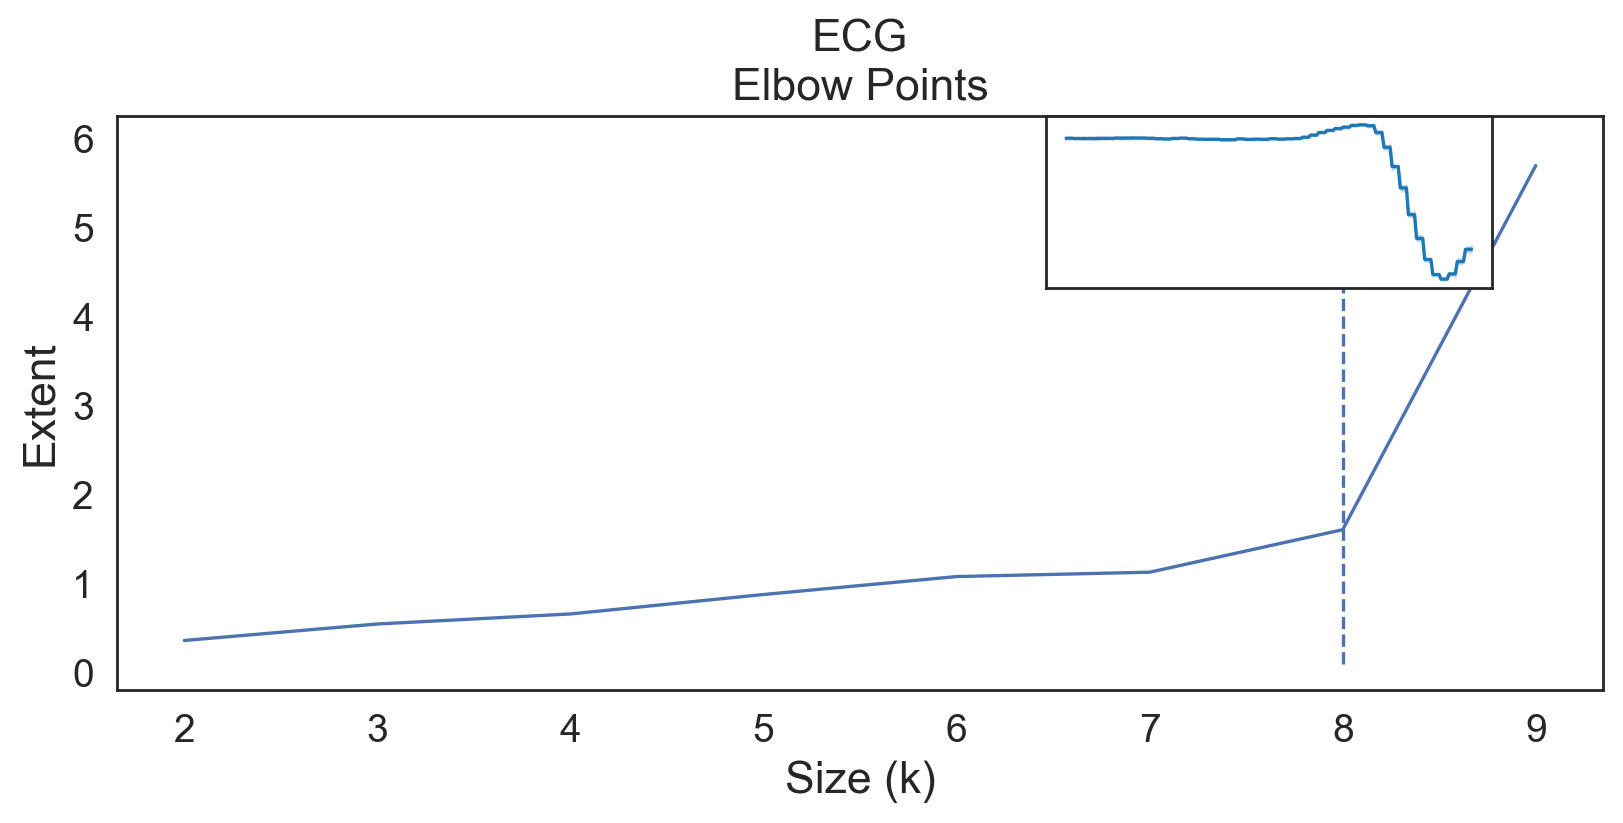

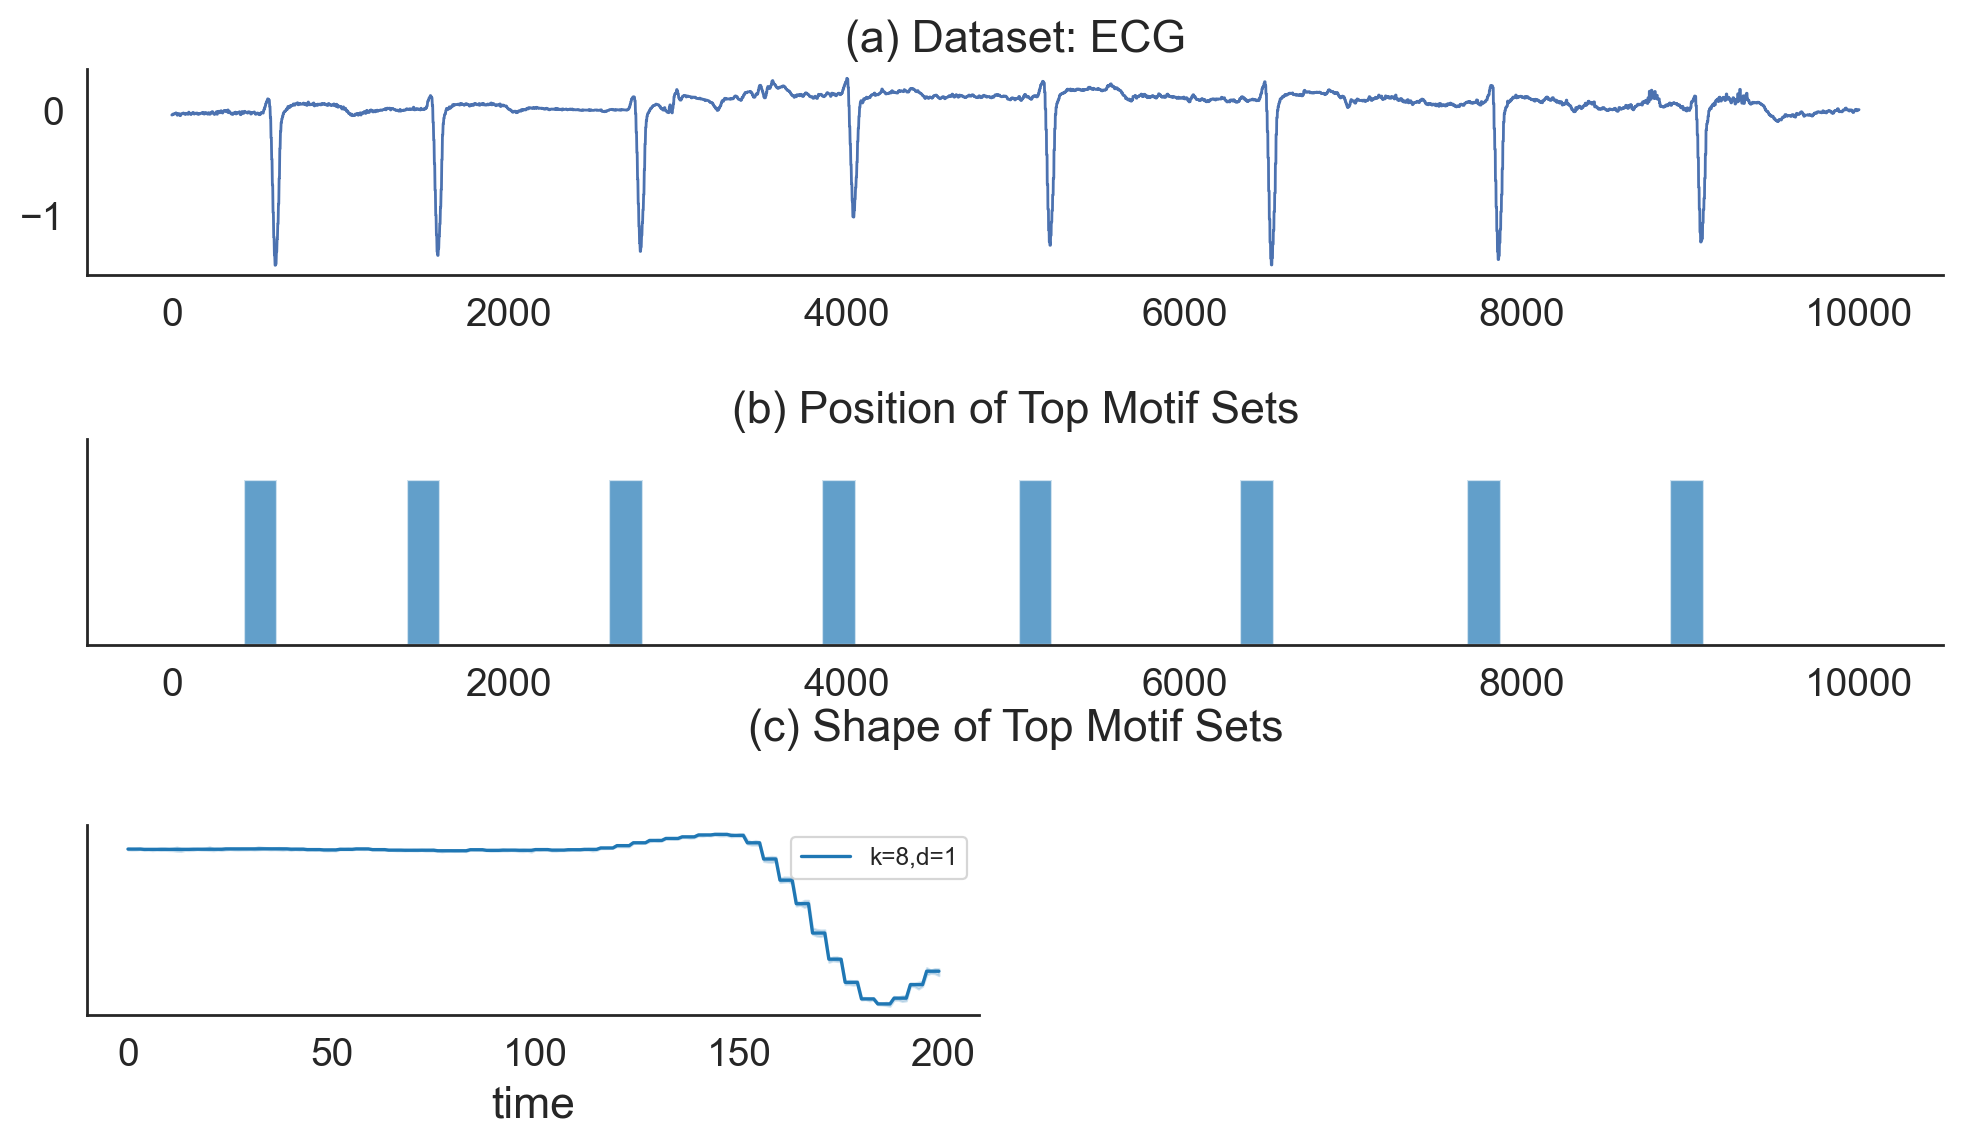

In [42]:
k=10
l=200
mot = Motiflets("ECG", series, elbow_deviation=2.0)
_ = mot.fit_k_elbow(k, l)

In [ ]:
print(np.sort(mot.motiflets[-1]))
print(mot.dists[-1])

In [ ]:
D_full, knns = ml.compute_distance_matrix(series.to_numpy(), 1000, 1)

In [ ]:
print(D_full.shape)
dim_index = np.zeros((D_full.shape[1], 1), dtype=np.int32)

In [ ]:
pos = np.sort(m.indices)
print(pos)

ml.get_pairwise_extent(D_full, pos, dim_index)**2
